# Community Detection

---

In [6]:
import sys

sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import networkx as nx
from matplotlib.colors import to_hex
from networkx.algorithms import community
import scripts.community_features as cf

---

## Get adjacency matrix

In [7]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/large_adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

---

## Identify communities

#### **Approach 1**: Hierarchical clustering

Co-occurrence Matrix (Disease-Disease):
[[10  0  0 ...  1  0 10]
 [ 0  9  1 ...  1  0  0]
 [ 0  1 10 ...  1  0  0]
 ...
 [ 1  1  1 ...  9  0  1]
 [ 0  0  0 ...  0 10  0]
 [10  0  0 ...  1  0 11]]


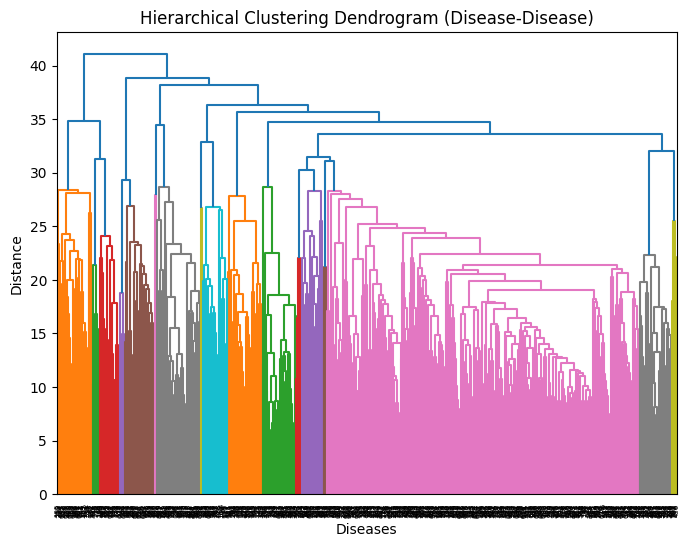

Cluster labels (Disease-Disease):
[3 1 1 4 4 4 4 4 4 1 4 4 4 4 4 4 3 4 4 4 2 1 4 2 4 4 1 4 4 4 4 4 4 1 1 1 4
 1 4 4 4 4 4 4 1 2 1 2 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 1 4 4 3 4 4 1 4 2 4 4 4
 2 4 4 4 4 4 1 4 1 4 4 4 4 4 1 4 3 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 4 4 4 1 4 4 4 4 4 1 1 1 4 3 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 1 4
 4 4 3 4 4 4 4 1 4 2 1 4 4 4 1 4 4 4 4 4 2 2 4 3 4 4 4 1 4 4 4 1 4 4 4 4 4
 4 4 1 4 1 3 4 4 4 3 1 1 4 2 2 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 1 3 4 2 1
 4 2 4 1 4 4 4 3 4 4 4 1 1 4 4 4 4 1 3 4 4 3 3 4 3 4 4 4 4 4 3 4 4 4 4 4 4
 4 4 4 4 4 3 4 3 4 4 4 1 2 1 4 4 4 4 4 1 4 4 4 4 4 4 4 3 4 4 4 1 4 3 4 4 4
 3 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 2 3 4 4 4 4
 4 4 4 3 4 2 1 4 4 4 4 4 2 3 4 3 1 4 4 4 4 3 4 3 1 4 3 4 4 2 4 1 4 4 2 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 2 4 4 4 4 4 2 4 4 3 4 4
 4 4 1 4 4 3 4 2 4 1 4 4 4 4 4 4 4 2 4 4 4 1 4 4 4 1 4 3 4 1 4 4 4

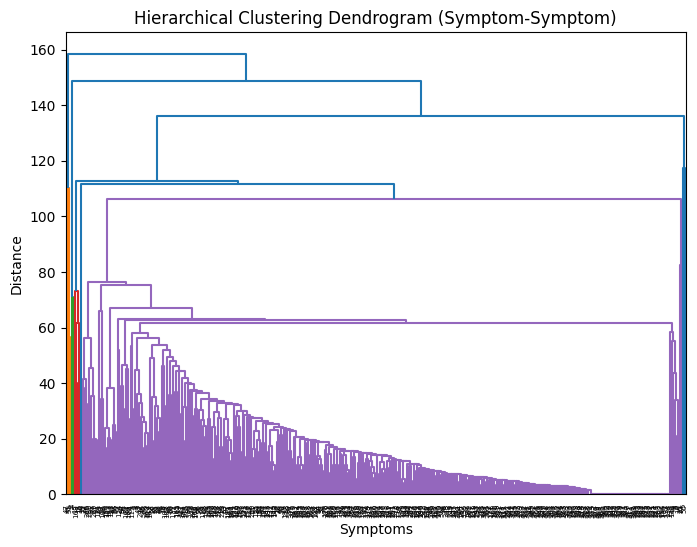

Cluster labels (Symptom-Symptom):
[3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 3 1 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3]


In [8]:
# ----------------------------- DISEASES -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G_d = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G_d.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G_d.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_d, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Disease-Disease)")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Disease-Disease):")
print(cluster_labels)


# ----------------------------- SYMPTOMS -----------------------------


# Compute co-occurrence matrix symptoms-symptoms
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G_s = nx.Graph()
# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G_s.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G_s.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_s, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Symptom-Symptom)")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Symptom-Symptom):")
print(cluster_labels)


#### **Approach 2**: Greedy modularity maximization

Communities: [frozenset({2, 5, 7, 8, 10, 11, 18, 19, 25, 27, 28, 31, 32, 33, 35, 37, 40, 42, 43, 44, 45, 49, 50, 54, 57, 64, 70, 71, 73, 75, 80, 81, 82, 84, 87, 89, 92, 94, 95, 97, 100, 101, 103, 106, 107, 108, 109, 111, 114, 116, 117, 118, 120, 121, 123, 128, 130, 131, 132, 134, 136, 139, 141, 142, 143, 145, 146, 149, 150, 151, 152, 158, 159, 162, 167, 173, 174, 175, 176, 177, 179, 188, 190, 192, 193, 194, 195, 198, 200, 204, 205, 206, 209, 210, 212, 213, 215, 218, 221, 222, 223, 229, 230, 233, 234, 236, 238, 240, 241, 242, 243, 244, 245, 246, 248, 253, 254, 257, 258, 260, 261, 262, 263, 264, 271, 272, 274, 278, 287, 290, 292, 295, 299, 300, 304, 306, 307, 308, 312, 313, 314, 317, 318, 321, 328, 330, 332, 338, 343, 346, 348, 350, 354, 356, 361, 362, 364, 368, 369, 370, 374, 375, 376, 379, 381, 382, 384, 386, 389, 392, 394, 397, 400, 401, 404, 406, 407, 408, 410, 411, 416, 417, 418, 419, 420, 421, 422, 429, 430, 432, 433, 434, 435, 437, 438, 440, 442, 443, 444, 446, 447, 448, 451, 452,

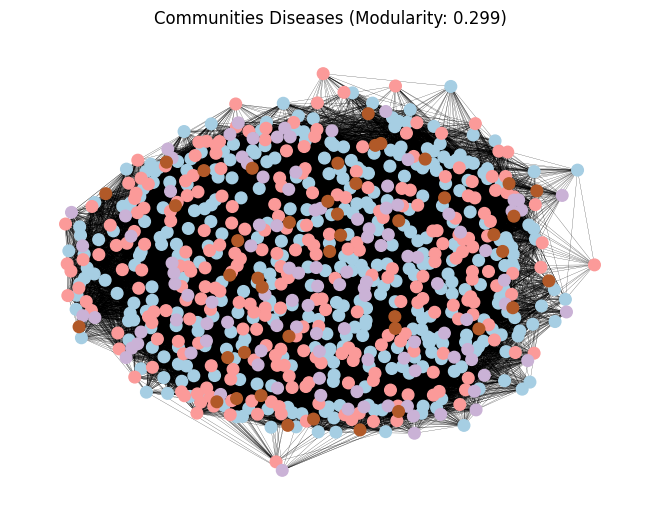

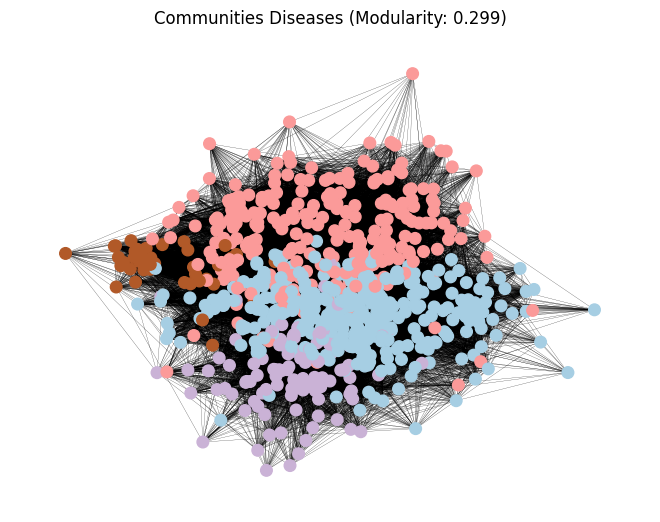

Communities: [frozenset({0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 23, 24, 27, 28, 29, 30, 32, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 96, 97, 98, 99, 101, 102, 103, 111, 123, 128, 129, 132, 136, 137, 138, 139, 140, 141, 142, 143, 158, 159, 160, 163, 179, 180, 181, 182, 184, 186, 188, 196, 198, 199, 200, 202, 203, 205, 206, 209, 210, 212, 213, 214, 216, 218, 227, 233, 234, 242, 243, 244, 245, 252, 253, 254, 255, 256, 257, 258, 264, 281, 285, 287, 288, 291, 298, 300, 302, 305, 312, 313, 314, 315, 319, 323, 325, 331, 332, 336, 338, 341, 342, 343, 344, 349, 351, 365}), frozenset({259, 260, 261, 262, 263, 265, 266, 12, 13, 14, 270, 269, 15, 274, 271, 19, 17, 18, 20, 279, 21, 276, 277, 278, 22, 280, 286, 38, 296, 41, 42, 301, 304, 50, 307, 309, 322, 73, 74, 75, 76, 333, 77, 78, 79, 80, 16, 337, 335, 81, 339, 82, 340, 272, 83, 84, 85, 348, 86, 87, 88, 89, 91, 92, 100, 354, 357, 358, 104, 105, 106, 363, 107, 108, 109, 110, 112, 371, 121, 122, 127,

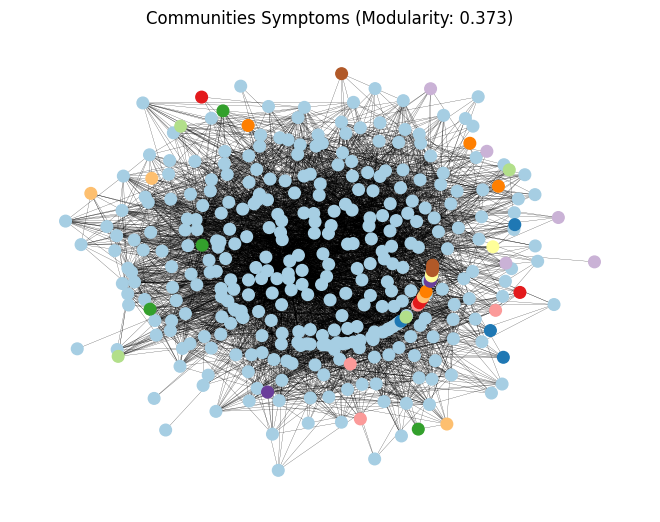

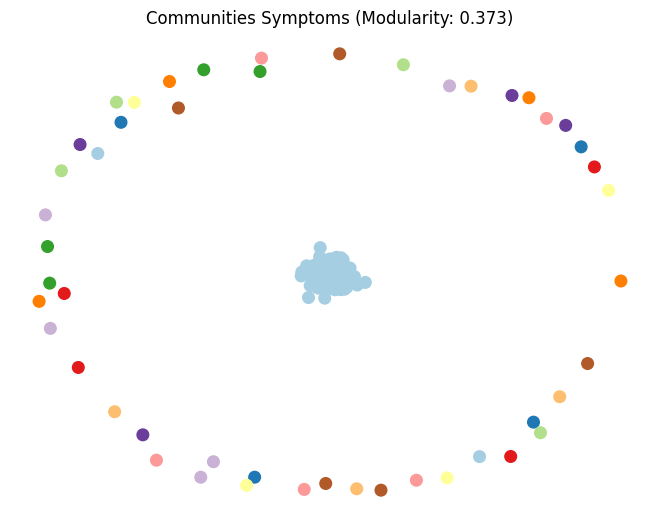

In [9]:
# --------------------------- DISEASES -----------------------------

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_d))
print("Communities:", communities)
modularity = nx.community.modularity(G_d, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
pos = nx.kamada_kawai_layout(G_d)  # You can choose other layout algorithms
nx.draw(
        G_d, 
        pos, 
        node_color=list(color_map.values()),
        with_labels=False, 
        cmap=plt.cm.Paired,
        node_size=70,
        width=0.15,
        )
        
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_d)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_d, 
    pos, 
    node_color=[color_map[node] for node in G_d.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()


# ----------------------------- SYMPTOMS -----------------------------


# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_s))
communities_greedy_mod = communities
print("Communities:", communities)
modularity = nx.community.modularity(G_s, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})
    

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
pos = nx.kamada_kawai_layout(G_s)  # You can choose other layout algorithms
nx.draw(
    G_s, pos, 
    node_color=list(color_map.values()), 
    with_labels=False, 
    cmap=plt.cm.Paired,
    node_size=70,
    width=0.15,
    )

plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_s)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_s, 
    pos, 
    node_color=[color_map[node] for node in G_s.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()

#### **Approach 3**: Girvan-Newman algorithm

In [ ]:
# ----------------------------- DISEASES -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
cf.visualize_communities(G, communities[0], 1)
cf.visualize_communities(G, communities[39], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()


In [ ]:
# ----------------------------- SYMPTOMS -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
cf.visualize_communities(G, communities[0], 1)
cf.visualize_communities(G, communities[2], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

---

## Community Features Extraction

**Girvan-Newman** --> list of tuples of sets. Each set represents a community. Each tuple a level in the dendrogram.

**Greedy Modularity** --> list of frozensets. Each set represents a community.

#### **Community Membership**: Vector representing the count of symptoms for each community.
#### **Community Size**: The number of symptoms or diseases in a community.

In [ ]:
# Creates features for all the samples and store in npz

# METHOD USED TO GET COMMUNITIES: GREEDY MODULARITY

data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv")
#data_onehot = data_onehot.drop("Unnamed: 0", axis=1)
data_onehot_y = data_onehot["Disease"].values
data_onehot_x = data_onehot.drop("Disease", axis=1).values


# COMMUNITY COUNT
comm_count_matrix = np.zeros((data_onehot_x.shape[0], len(communities_greedy_mod)))
for i in range(data_onehot_x.shape[0]):
    comm_count_matrix[i] = cf.get_community_count(data_onehot_x[i], communities_greedy_mod)

np.savez_compressed("../prediction_model/features/community_count.npz", X=comm_count_matrix, y=data_onehot_y)

# COMMUNITY SIZE
comm_size_matrix = np.zeros((data_onehot_x.shape[0], data_onehot_x.shape[1]))
for i in range(data_onehot_x.shape[0]):
    comm_size_matrix[i] = cf.get_community_size(data_onehot_x[i], communities_greedy_mod)

np.savez_compressed("../prediction_model/features/community_size.npz", X=comm_size_matrix, y=data_onehot_y)

In [ ]:
# Replace the community numbers with the community names
names = data_onehot.columns.values.tolist()[:-1]
community_names = []
communities_with_names = []
for comm_number, community in enumerate(communities_greedy_mod):
    for node in community:
        comm_name = names[node]
        community_names.append(comm_name)
    communities_with_names.append(community_names)